# Heart Disease Prediction (Classification) 

**Project Objective:** To build a machine learning model that can accurately predict whether a patient has heart disease based on a set of medical attributes.

In [3]:
import sys
print(sys.executable)
# always use this command to install modules in current working environment
!{sys.executable} -m pip install kagglehub

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\python.exe



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer

sns.set_style('whitegrid')

In [5]:
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
df.set_index('id', inplace=True)

In [7]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


In [9]:
df['dataset'].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [10]:
df['trestbps'].value_counts()

120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: trestbps, Length: 61, dtype: int64

In [11]:
df['num'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [12]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [13]:
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [14]:
#  in this dataset we will not do EDA steps manually , rather we will do it through pipeline

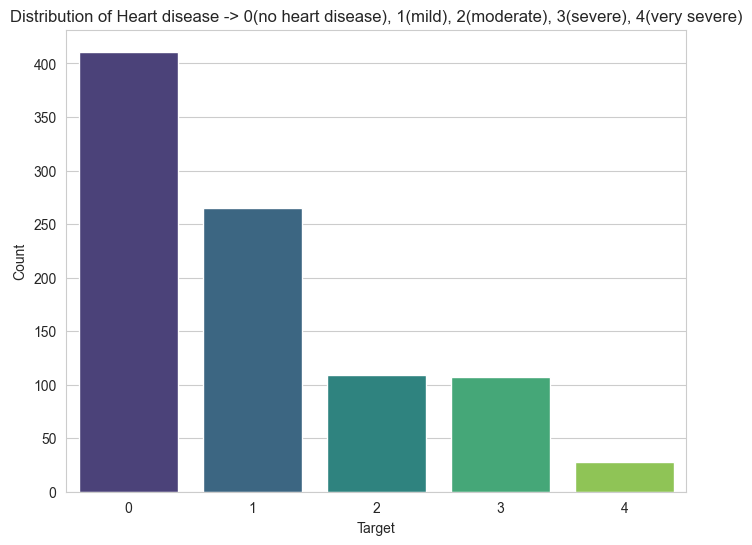

In [15]:
# lets us analyze the target variable
plt.figure(figsize=(8,6))
sns.countplot(x='num', data=df, palette='viridis')
plt.title('Distribution of Heart disease -> 0(no heart disease), 1(mild), 2(moderate), 3(severe), 4(very severe)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

## Features v/s Target

Text(0.5, 1.0, 'sex vs heart disease')

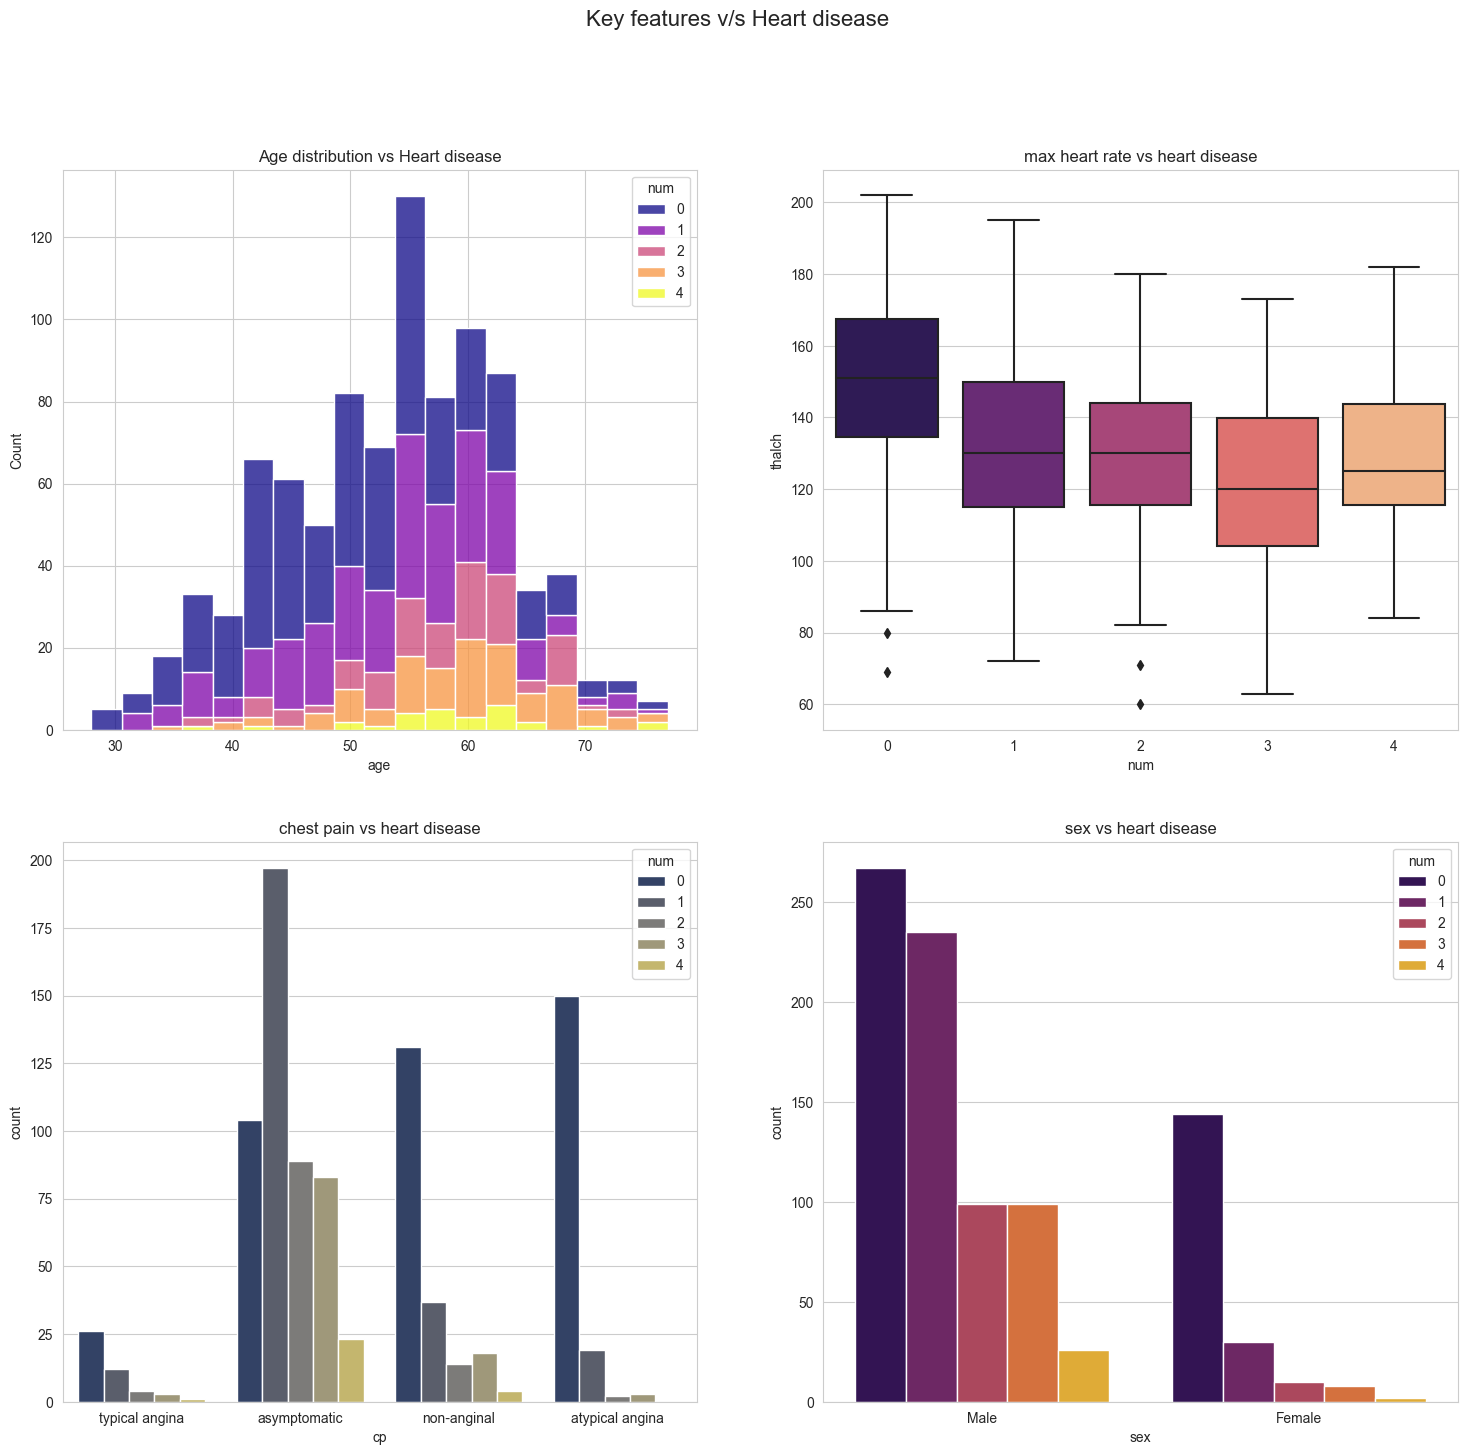

In [16]:
fig, axes = plt.subplots(2,2 , figsize=(18, 16))
fig.suptitle('Key features v/s Heart disease', fontsize=16)

# histplot to analyze age vs heart disease
sns.histplot(ax=axes[0,0], data=df, x='age', hue='num', palette='plasma', multiple='stack').set_title('Age distribution vs Heart disease')

# box plot to analyze max heart rate vs heart disease(we will compare medians of heart rates of various cases, we will see range of heart rates in diffrent cases of heart disease)
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma').set_title('max heart rate vs heart disease')

# count plot to analyze heart disease in different types of chest pain
sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis').set_title('chest pain vs heart disease')

# count plot to analyze sex vs heart disease(herat disease in male vs female -> who are more vulnerable)
sns.countplot(ax=axes[1,1], data=df, x='sex', hue='num', palette='inferno').set_title('sex vs heart disease')


**Insights:**
- **Max Heart Rate (`thalach`):** Patients with heart disease tend to have a lower maximum heart rate.
- **Chest Pain (`cp`):** Patients with chest pain types 1 and 2 (Asymptomatic and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with atypical pain (type 3) are not likely to have the disease.
- **Sex:** A higher proportion of females in this dataset have heart disease compared to males.

## Data Preprocessing
we will use sklearn pipeline for our data preprocessing job
1.  **Separating features (X) and target (y).**
2.  **Identifying categorical features** that need to be encoded.
3.  **One-Hot Encoding** categorical features to convert them into a numerical format.
4.  **Scaling numerical features** so they are on a similar scale.

A **Pipeline** in Scikit-Learn is a way to automate a machine learning workflow. It allows us to chain together multiple steps, such as preprocessing, dimensionality reduction, and model training, into a single object.

In [17]:
from sklearn.impute import SimpleImputer

df['num_binary'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Now use df['num_binary'] instead of df['num'] while training
x = df.drop(['num', 'num_binary'], axis=1)


y = df['num']
y_binary = df['num_binary']

# dataset just contain info about where it was collected so we dont need it
x = x.drop('dataset', axis=1)

# categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

# preprocessing pipeline for categorical features
# drop=first avoid multicollinearlity
# unkown categories will be ignored
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# creating a column transformer
preprocessor = ColumnTransformer(transformers = [('num', numerical_transformer, numerical_features), ('cat', categorical_transformer, categorical_features)])

# train test split
# stratify = y ensure class distribution remains same in both train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

* Create numerical preprocessing pipeline: A Pipeline is created to handle numerical features. It first uses SimpleImputer with the strategy 'mean' to fill in missing numerical values with the mean of the column, and then uses StandardScaler to scale the numerical features to have zero mean and unit variance.
* Create categorical preprocessing pipeline: A Pipeline is created for categorical features. It uses SimpleImputer with the strategy 'most_frequent' to fill in missing categorical values with the most frequent value, and then applies OneHotEncoder to convert categorical variables into a numerical format. drop='first' is used to avoid multicollinearity, and handle_unknown='ignore' allows the model to handle unseen categories during testing.

In [18]:
# logistic regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

lr_pipeline.fit(x_train, y_train)
y_pred_lr = lr_pipeline.predict(x_test)

In [19]:
print("Expected numerical features:", numerical_features)
print("Actual columns in X:", x.columns)


Expected numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Actual columns in X: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [20]:
#  random forest pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
rf_pipeline.fit(x_train, y_train)
y_pred_rf = rf_pipeline.predict(x_test)

In [21]:
# Create the SVM pipeline
from sklearn.svm import SVC

svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', SVC(random_state=42))])

svm_pipeline.fit(x_train, y_train)
y_pred_svm = svm_pipeline.predict(x_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier())])

knn_pipeline.fit(x_train, y_train)
y_pred_knn = knn_pipeline.predict(x_test)

### Model Evaluation
For classification, accuracy isn't the whole story. We use a **Confusion Matrix** to get a deeper look at performance.

- **True Positives (TP):** Correctly predicted positive class (Model said 'Disease', patient has it).
- **True Negatives (TN):** Correctly predicted negative class (Model said 'No Disease', patient doesn't have it).
- **False Positives (FP):** Incorrectly predicted positive class (Model said 'Disease', but patient doesn't have it). Also called a **Type I Error**.
- **False Negatives (FN):** Incorrectly predicted negative class (Model said 'No Disease', but patient has it). Also called a **Type II Error**. This is often the most dangerous type of error in medical diagnoses.



From this, we derive key metrics:
- **Accuracy:** (TP+TN) / Total. Overall, how often is the classifier correct?
- **Precision:** TP / (TP+FP). Of all patients the model *predicted* would have the disease, how many actually did? (Measures the cost of FPs).
- **Recall (Sensitivity):** TP / (TP+FN). Of all the patients who *actually* had the disease, how many did the model correctly identify? (Measures the cost of FNs).
- **F1-Score:** The harmonic mean of Precision and Recall. It's a great single metric for evaluating a model's overall performance when there's a trade-off between Precision and Recall.

- **Zero_Division = 0** means ignore the error coming out due to division with zero

In [23]:
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.46      0.57      0.51        53
           2       0.38      0.14      0.20        22
           3       0.22      0.24      0.23        21
           4       0.00      0.00      0.00         6

    accuracy                           0.59       184
   macro avg       0.37      0.36      0.35       184
weighted avg       0.56      0.59      0.57       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        82
           1       0.53      0.55      0.54        53
           2       0.12      0.09      0.11        22
           3       0.19      0.19      0.19        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.32      0.33      0.33       184
we

In [24]:
# logistic regression has higher accuracy here, but none of the models are working well on category 4, the solution can be to
#  use binary classification

In [25]:
x_train, x_test, y_binary_train, y_binary_test = train_test_split(x, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

In [26]:
# logistic regression pipeline
lr_pipeline_bin = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

lr_pipeline.fit(x_train, y_binary_train)
y_pred_lr_bin = lr_pipeline.predict(x_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN pipeline
knn_pipeline_bin = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier())])

knn_pipeline.fit(x_train, y_binary_train)
y_pred_knn_bin = knn_pipeline.predict(x_test)

In [28]:
# Create the SVM pipeline
from sklearn.svm import SVC

svm_pipeline_bin = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', SVC(random_state=42))])

svm_pipeline.fit(x_train, y_binary_train)
y_pred_svm_bin = svm_pipeline.predict(x_test)

In [29]:
#  random forest pipeline
rf_pipeline_bin = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
rf_pipeline.fit(x_train, y_binary_train)
y_pred_rf_bin = rf_pipeline.predict(x_test)

In [30]:
print("--- Logistic Regression Performance ---")
print(classification_report(y_binary_test, y_pred_lr_bin, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_binary_test, y_pred_rf_bin, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_binary_test, y_pred_svm_bin, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_binary_test, y_pred_knn_bin, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        82
           1       0.83      0.87      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        82
           1       0.84      0.90      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184


--- Support Vector Machine (SVM) Performance ---
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        82
           1       0.83      0.91      0.87       102

    accuracy                           0.85       184
   

After converting the target variable from multi-class (`num`) to binary (`num_binary`), the performance of all models significantly improved.

### ✅ Performance Summary

| Model                  | Accuracy | Weighted F1-Score | Key Observation |
|------------------------|----------|-------------------|------------------|
| Logistic Regression     | **0.83** | **0.83**          | Fast and interpretable |
| Random Forest           | **0.85** | **0.85**          | Best balance of precision & recall |
| Support Vector Machine  | **0.85** | **0.85**          | Very stable performance |
| K-Nearest Neighbors     | **0.85** | **0.85**          | Good without tuning |

### 🏆 Best Overall Model

**Random Forest** shows the most practical reliability — strong accuracy, balanced precision/recall, and robustness to noise.  
It is recommended as the **final model for heart disease detection**.

### Feature importance(for tree based model)

In [33]:
# Extract feature names after one-hot encoding
rf_pipeline_bin.fit(x_train, y_binary_train)
feature_names = rf_pipeline_bin.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances from the trained model
importances = rf_pipeline_bin.named_steps['classifier'].feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

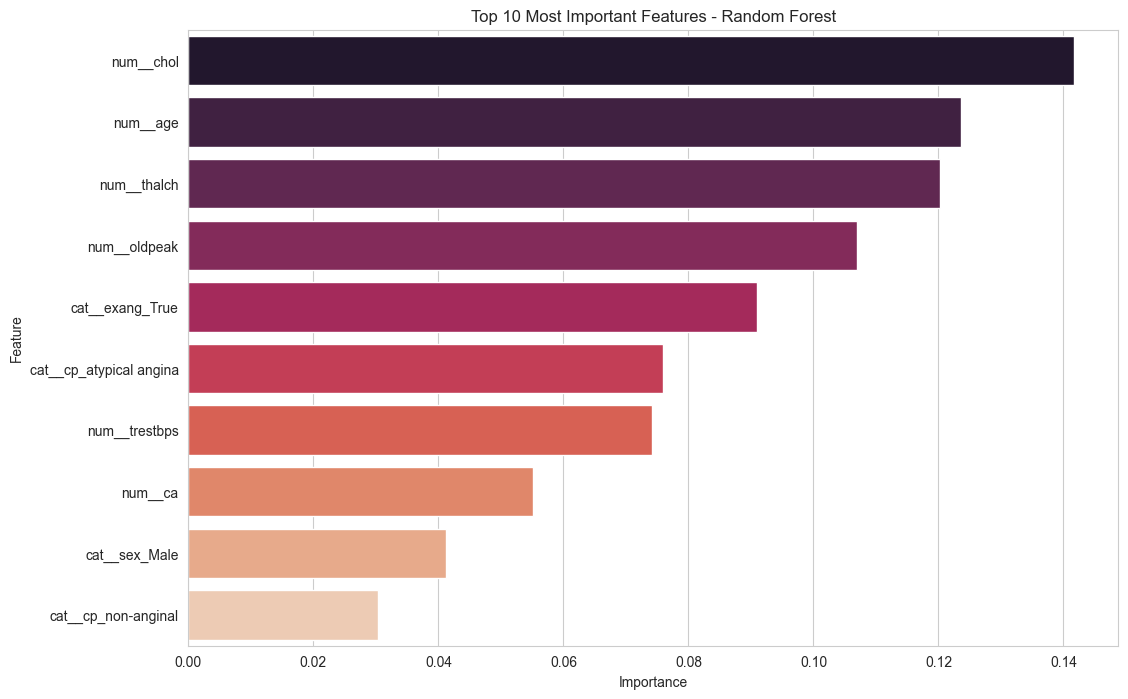

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket')
plt.title('Top 10 Most Important Features - Random Forest')
plt.show()

In [ ]:
# above are top 10 features according to their importance on target variable